******DON'T FORGET TO UPVOTE******

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize MediaPipe pose class
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Drawing utilities
mp_drawing = mp.solutions.drawing_utils

# Start webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame.")
        break

    # Flip image for natural selfie view
    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame and find pose landmarks
    result = pose.process(rgb_frame)

    # Draw the pose annotation on the frame
    if result.pose_landmarks:
        mp_drawing.draw_landmarks(
            frame, result.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        # You can extract keypoints here for ML classification
        landmarks = result.pose_landmarks.landmark
        keypoints = np.array([[lm.x, lm.y, lm.z] for lm in landmarks]).flatten()

        # Example: print or use keypoints to classify poses
        # pose_label = your_model.predict(keypoints)
        # cv2.putText(frame, pose_label, (10, 30), ...)

    # Display the frame
    cv2.imshow("Yoga Pose Recognition", frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release and close
cap.release()
cv2.destroyAllWindows()


In [ ]:
#for visualization

import matplotlib.pyplot as plt
import imageio
import matplotlib.image as img
from tensorflow.keras.preprocessing import image
import numpy as np
#read image path

import pathlib
from pathlib import Path


#for image processing

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.models import load_model
from PIL import Image
#for model

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import *

#for warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_path=pathlib.Path('/content/drive/MyDrive/YOGAA-2')
test_path=pathlib.Path('/content/drive/MyDrive/YOGAA-2')
val_path=pathlib.Path('/content/drive/MyDrive/YOGAA-2')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_classes=os.listdir(train_path)
image_classes

['TREE POSE', 'BUTTERFLY', 'BRIDGE', 'WARRIOR', 'CAT POSE']

In [ ]:
def plot_images (image_classes):

    plt.figure(figsize=(12,12))

    for i, category in enumerate (image_classes):

        image_path= train_path / category
        image_in_folder=os.listdir(image_path)

        first_image=image_in_folder[0]
        first_image_path=image_path / first_image

        img=image.load_img(first_image_path)
        img_array=image.img_to_array(img) / 255

        plt.subplot(4,4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')

plt.show()

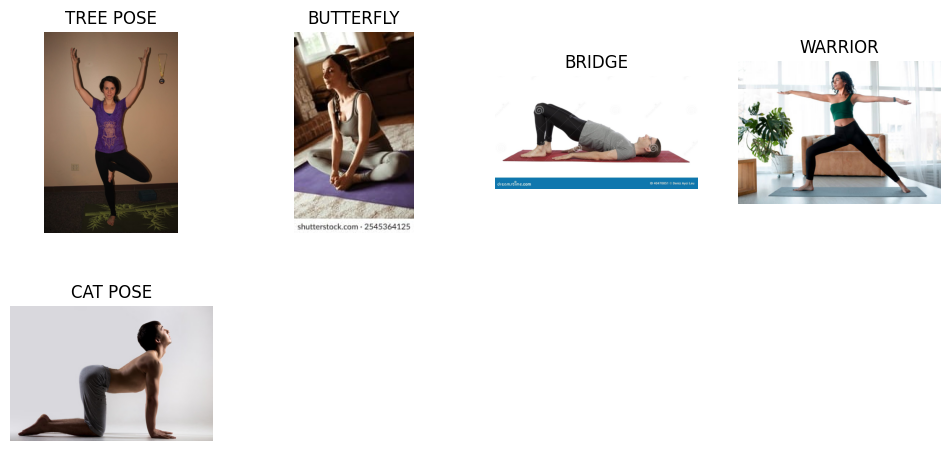

In [ ]:
 plot_images(image_classes)

In [ ]:
image_generator=ImageDataGenerator(rescale=1/255,validation_split=0.2)

In [ ]:
train_data=image_generator.flow_from_directory(train_path,
                                               target_size=(224,224),
                                              batch_size=32,
                                              shuffle=True,
                                              class_mode='categorical',
                                              subset='training')


Found 336 images belonging to 5 classes.


In [ ]:
test_data=image_generator.flow_from_directory(train_path,
                                               target_size=(224,224),
                                              batch_size=1,
                                              shuffle=False,
                                              class_mode='categorical',
                                              subset='validation')

Found 82 images belonging to 5 classes.


In [ ]:
print(test_data.image_shape)
print(train_data.image_shape)

(224, 224, 3)
(224, 224, 3)


In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

# Output Layer for 16 classes
model.add(Dense(5, activation='softmax'))

In [ ]:
###### model.summary()

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model_history=model.fit(train_data,epochs=50,validation_data=test_data)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 179s 15s/step - accuracy: 0.2326 - loss: 1.7889 - val_accuracy: 0.5000 - val_loss: 1.5698
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step - accuracy: 0.5589 - loss: 1.4674 - val_accuracy: 0.5122 - val_loss: 1.2777
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 327ms/step - accuracy: 0.6647 - loss: 0.9260 - val_accuracy: 0.5976 - val_loss: 1.2420
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 393ms/step - accuracy: 0.7576 - loss: 0.6694 - val_accuracy: 0.6463 - val_loss: 0.9515
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 373ms/step - accuracy: 0.9009 - loss: 0.3621 - val_accuracy: 0.6220 - val_loss: 1.1915
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.9632 - loss: 0.1743 - val_accuracy: 0.6585 - val_loss: 1.2009
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 389ms/step - accuracy: 0.9766 - loss: 0.1005 - val_accuracy: 0.7561 - val_loss: 1.3692
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 354ms/step - accuracy: 0.9913 - loss: 0.0412 - val_accuracy: 0.

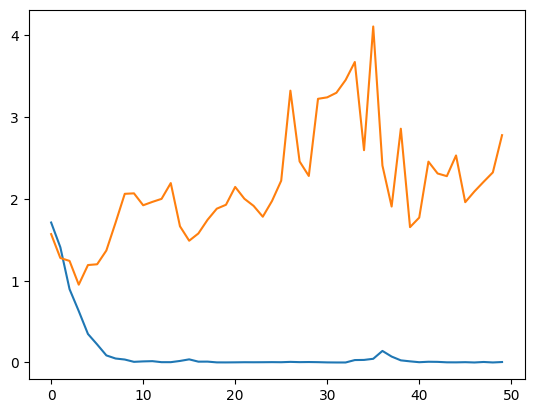

In [ ]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')

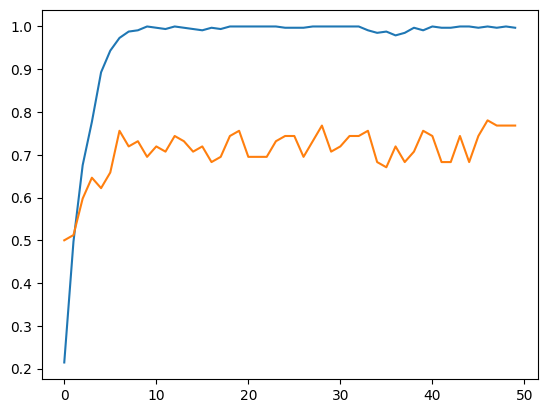

In [ ]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation_accuracy')

In [ ]:
model.evaluate(train_data)

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 424ms/step - accuracy: 1.0000 - loss: 7.5014e-06


[9.884561222861521e-06, 1.0]

In [ ]:
model.evaluate(test_data)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8479 - loss: 1.3522


[2.229480266571045, 0.7682926654815674]

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


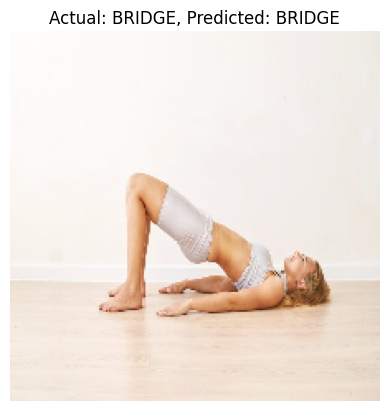

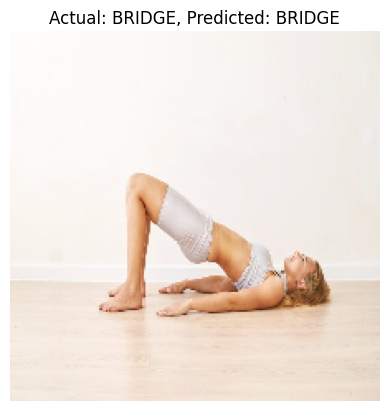

In [ ]:
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
actual_classes = test_data.classes


class_labels = list(test_data.class_indices.keys())  # Class names

for i in range(2):
    img, label = test_data[i]
    actual_label = class_labels[actual_classes[i]]
    predicted_label = class_labels[predicted_classes[i]]

    plt.imshow(img[0])
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is inco